In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Carica i dati di training e testing dai file CSV
df_train = pd.read_csv("Dataset/training_balanced.csv")
df_test = pd.read_csv("Dataset/testing.csv")

# Separazione delle feature e del target nei dati di training e testing
x_train = df_train.drop('GradeClass', axis=1)
y_train = df_train['GradeClass']
x_test = df_test.drop('GradeClass', axis=1)
y_test = df_test['GradeClass']


Modello: Random Forest
Accuratezza: 0.9109
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        33
         1.0       0.77      0.90      0.83        80
         2.0       0.92      0.89      0.91       121
         3.0       0.86      0.90      0.88       127
         4.0       0.99      0.95      0.97       357

    accuracy                           0.91       718
   macro avg       0.84      0.86      0.85       718
weighted avg       0.92      0.91      0.91       718



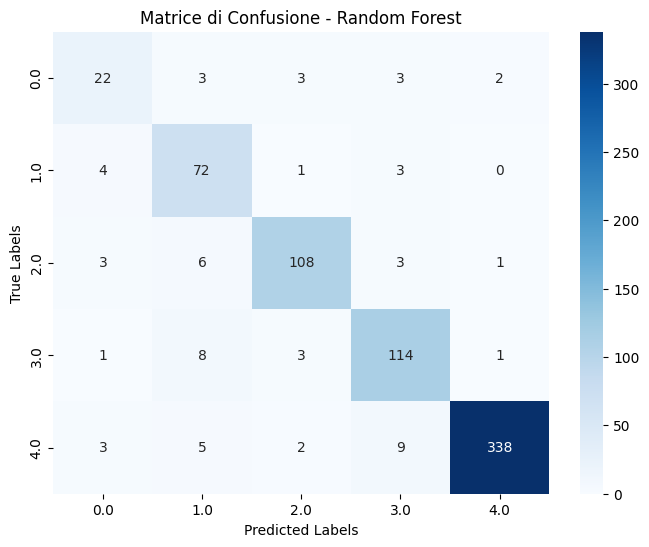


Modello: K-Nearest Neighbors
Accuratezza: 0.5153
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.19      0.42      0.26        33
         1.0       0.26      0.34      0.30        80
         2.0       0.30      0.33      0.31       121
         3.0       0.32      0.39      0.35       127
         4.0       0.96      0.67      0.79       357

    accuracy                           0.52       718
   macro avg       0.41      0.43      0.40       718
weighted avg       0.62      0.52      0.55       718



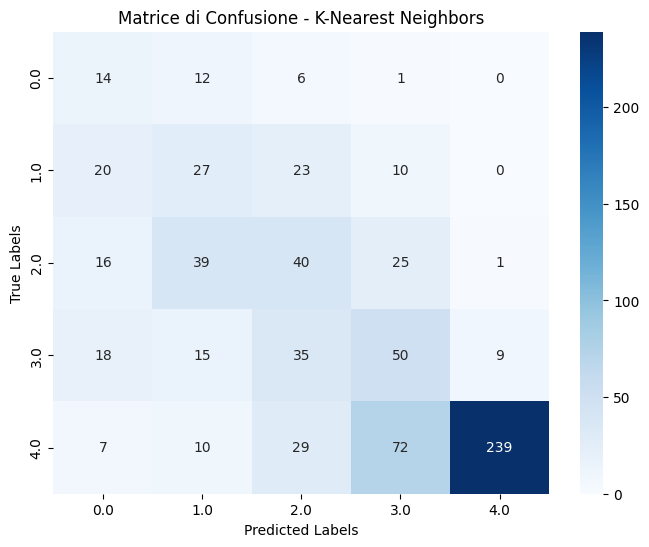


Modello: Support Vector Classifier


/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Accuratezza: 0.3649
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.11      0.58      0.18        33
         1.0       0.00      0.00      0.00        80
         2.0       0.00      0.00      0.00       121
         3.0       0.16      0.20      0.18       127
         4.0       0.57      0.61      0.59       357

    accuracy                           0.36       718
   macro avg       0.17      0.28      0.19       718
weighted avg       0.32      0.36      0.33       718



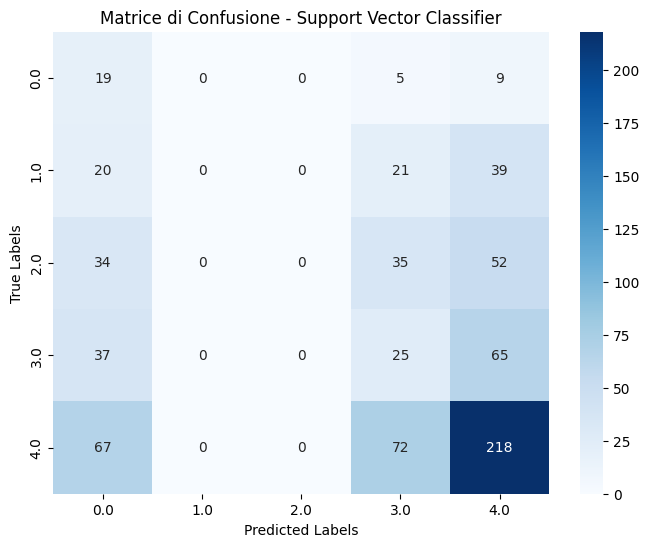


Modello: Decision Tree
Accuratezza: 0.9206
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.71      0.61      0.66        33
         1.0       0.76      0.90      0.82        80
         2.0       0.94      0.90      0.92       121
         3.0       0.93      0.91      0.92       127
         4.0       0.97      0.96      0.97       357

    accuracy                           0.92       718
   macro avg       0.86      0.86      0.86       718
weighted avg       0.92      0.92      0.92       718



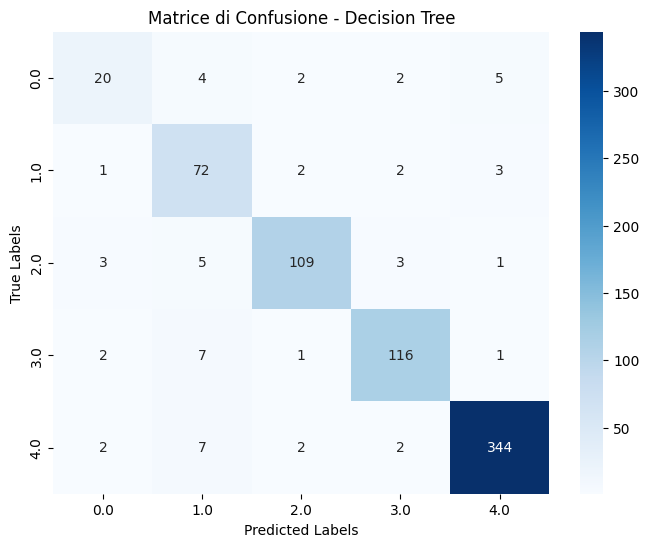


Modello: Naive Bayes
Accuratezza: 0.6574
Report di classificazione:
               precision    recall  f1-score   support

         0.0       0.08      0.21      0.12        33
         1.0       0.44      0.31      0.36        80
         2.0       0.65      0.49      0.56       121
         3.0       0.51      0.70      0.59       127
         4.0       0.94      0.82      0.88       357

    accuracy                           0.66       718
   macro avg       0.52      0.51      0.50       718
weighted avg       0.72      0.66      0.68       718



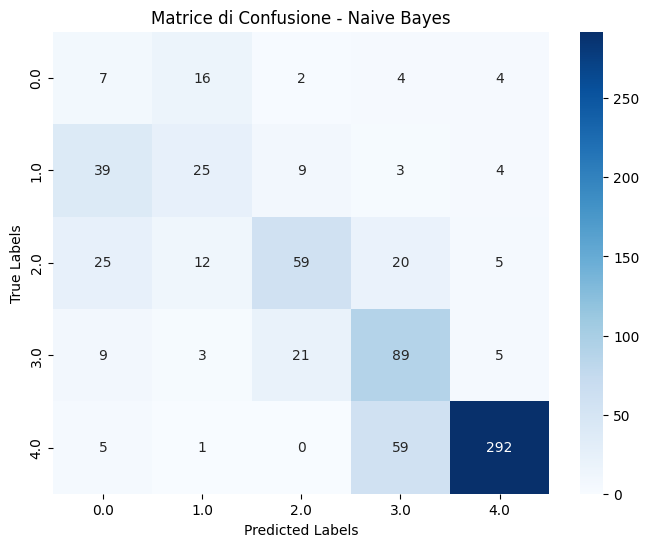

In [11]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Itera su ciascun modello per addestrare, fare previsioni e valutare le prestazioni
for model_name, model in models.items():
    print(f"\nModello: {model_name}")
    
    # Addestra il modello
    model.fit(x_train, y_train)
    
    # Previsione sul set di test
    y_pred = model.predict(x_test)
    
    # Valuta le prestazioni
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calcola la matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    
    # Stampa i risultati
    print(f"Accuratezza: {accuracy:.4f}")
    print("Report di classificazione:\n", report)
    
    # Visualizza la matrice di confusione
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Matrice di Confusione - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()